In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from datetime import datetime
import time
import json

# 1. DIVIDING DA DATASET

In [100]:
# Load the dataset
df = pd.read_csv("dataquest_fraud_test.csv")
df

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,latitude,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud
0,2020-06-27 19:47,3573390000000000,fraud_Volkman Ltd,misc_net,667.17,Stephanie,Murphy,F,526 Stacy Walks,Barnard,...,45.7205,-98.5534,63,Systems developer,1969-10-30,276495f58de3af46843647fdd00843eb,1372362479,46.040300,-97.710460,NaN
1,2020-12-16 6:29,3579200000000000,fraud_Pfeffer and Sons,shopping_pos,132.40,Tyler,Small,M,047 Kevin Haven,Boyd,...,44.9437,-91.0294,1690,IT trainer,1975-12-24,0bd7e2199cc5dbe847d90f1ca1d94974,1387175381,45.680527,-91.026459,NaN
2,2020-08-08 22:02,343819000000000,fraud_Kovacek Ltd,travel,10.45,Shelby,Cannon,F,1535 Ryan Burgs Suite 919,Des Moines,...,41.5855,-93.6719,222785,Wellsite geologist,1956-01-24,873e753bf1a897daf144b2fe9b039fd2,1375999332,41.593729,-94.291725,NaN
3,2020-12-16 23:41,4292900000000000000,fraud_Lemke and Sons,travel,8.89,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,fdfa039f3d2678522f57003bf1c38a7f,1387237267,46.478129,-114.636119,NaN
4,2020-09-24 1:14,4427810000000,fraud_Kerluke Inc,misc_net,809.83,Michelle,Rodriguez,F,1742 Brandon Squares Apt. 461,Ruidoso,...,33.3305,-105.6933,8874,Licensed conveyancer,2000-08-16,f442042f8f14ec7cd9d5fddece9b75b2,1379985277,32.842035,-104.904134,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2020-08-18 0:41,4623560000000,"fraud_Robel, Cummerata and Prosacco",gas_transport,49.57,Vincent,Waller,M,9379 Vanessa Run Apt. 400,Lohrville,...,42.2619,-94.5566,695,Administrator,1954-07-15,7641e8acbcbc7ead2c5e19c8a65a9596,1376786463,43.087884,-95.470979,NaN
2247,2020-08-10 3:41,30238800000000,fraud_Cummerata-Jones,gas_transport,11.17,Danielle,Yu,F,5395 Colon Burgs Suite 037,Thrall,...,30.5920,-97.2893,1766,Press sub,1976-01-02,17afa1e98c9f427f4c4c7bfc0654f248,1376106091,30.611255,-98.145016,NaN
2248,2020-08-29 23:27,4908850000000000,fraud_Crooks and Sons,personal_care,64.48,Lauren,Torres,F,03030 White Lakes,Grandview,...,32.2779,-97.2351,5875,"Radiographer, therapeutic",1992-07-24,35c8b62ff6319568e12288d5fe50356a,1377818831,31.839034,-96.299775,NaN
2249,2020-12-30 10:11,30407700000000,fraud_Emard Inc,gas_transport,61.49,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,45f041bb03884592952ab4e3290369ca,1388398275,42.446262,-76.721284,NaN


In [101]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Remove rows where all elements are NaN
df.dropna(how='all', inplace=True)

# Removing firstName, lastName, transNum, creditCardNum columns
df.drop(['firstName', 'lastName', 'transNum', 'creditCardNum', 'street'], axis=1, inplace=True)

# Convert transDate column to datetime format
df['transDate'] = pd.to_datetime(df['transDate'], format='%Y-%m-%d %H:%M')

# Convert transDate to Unix time and create a new unixTime column
df['unixTime'] = df['transDate'].astype('int64') // 10**9
df = df.drop(['transDate'], axis=1)

df.head()

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,dateOfBirth,unixTime,merchLatitude,merchLongitude,isFraud
0,fraud_Volkman Ltd,misc_net,667.17,F,Barnard,SD,57426,45.7205,-98.5534,63,Systems developer,1969-10-30,1593287220,46.040300,-97.710460,NaN
1,fraud_Pfeffer and Sons,shopping_pos,132.40,M,Boyd,WI,54726,44.9437,-91.0294,1690,IT trainer,1975-12-24,1608100140,45.680527,-91.026459,NaN
2,fraud_Kovacek Ltd,travel,10.45,F,Des Moines,IA,50312,41.5855,-93.6719,222785,Wellsite geologist,1956-01-24,1596924120,41.593729,-94.291725,NaN
3,fraud_Lemke and Sons,travel,8.89,M,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,1608162060,46.478129,-114.636119,NaN
4,fraud_Kerluke Inc,misc_net,809.83,F,Ruidoso,NM,88355,33.3305,-105.6933,8874,Licensed conveyancer,2000-08-16,1600910040,32.842035,-104.904134,NaN


# 2. Catgeorical Data to Numerical Data

## Encoding Catg. Data

In [102]:
# Encoding Gender
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'F' else 1)

# Encoding Age
def calculate_age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str, "%Y-%m-%d")
    today = datetime.now()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age
    
df['age'] = df['dateOfBirth'].apply(calculate_age)
df = df.drop(['dateOfBirth'], axis=1)


conditions = [
    df['state'].isin(['RI', "MT", "DC"]),  # States condition
    #df['age'].between(26, 30),                         # Age 26-30 condition
    df['age'].between(61, 65)                          # Age 61-65 condition
]

# Corresponding values for each condition
choices = [1, 1]

# Default value if none of the conditions are met
default_choice = 0

# Create the 'risk' column based on the conditions
df['risk'] = np.select(conditions, choices, default=default_choice)

df.head()

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age,risk
0,fraud_Volkman Ltd,misc_net,667.17,0,Barnard,SD,57426,45.7205,-98.5534,63,Systems developer,1593287220,46.040300,-97.710460,NaN,54,0
1,fraud_Pfeffer and Sons,shopping_pos,132.40,1,Boyd,WI,54726,44.9437,-91.0294,1690,IT trainer,1608100140,45.680527,-91.026459,NaN,48,0
2,fraud_Kovacek Ltd,travel,10.45,0,Des Moines,IA,50312,41.5855,-93.6719,222785,Wellsite geologist,1596924120,41.593729,-94.291725,NaN,68,0
3,fraud_Lemke and Sons,travel,8.89,1,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1608162060,46.478129,-114.636119,NaN,28,1
4,fraud_Kerluke Inc,misc_net,809.83,0,Ruidoso,NM,88355,33.3305,-105.6933,8874,Licensed conveyancer,1600910040,32.842035,-104.904134,NaN,23,0


In [67]:
df.risk.value_counts()[1] / (df.risk.value_counts()[0] + df.risk.value_counts()[1])

0.08017181639185578

# One Hot Encoding Data

In [111]:
"""
print(df.groupby('job').job.count())
print(df.groupby('state').state.count())
print(df.groupby('city').city.count())
print(df.groupby('category').category.count())
print(df.groupby('business').business.count())
"""

#df = pd.get_dummies(df, columns=['job'])
#df = pd.get_dummies(df, columns=['state'])
#df = pd.get_dummies(df, columns=['city'])
df = pd.get_dummies(df, columns=['category'])
#df = pd.get_dummies(df, columns=['business'])

df = df.drop(["job", "state", "city", "business", "zip"], axis=1)
df

KeyError: "None of [Index(['category'], dtype='object')] are in the [columns]"

In [112]:
df

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.160662,0,45.7205,-98.5534,0.000039,0.030577,0.570467,0.688879,NaN,0.4375,...,0,0,0,0,1,0,0,0,0,0
1,0.031883,1,44.9437,-91.0294,0.001048,0.918571,0.562831,0.756507,NaN,0.3625,...,0,0,0,0,0,0,0,0,1,0
2,0.002516,0,41.5855,-93.6719,0.138095,0.248599,0.476093,0.723469,NaN,0.6125,...,0,0,0,0,0,0,0,0,0,1
3,0.002141,1,45.8433,-113.8748,0.000135,0.922283,0.579759,0.517627,NaN,0.1125,...,0,0,0,0,0,0,0,0,0,1
4,0.195016,0,33.3305,-105.6933,0.005501,0.487544,0.290348,0.616094,NaN,0.0500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,0.011937,1,42.2619,-94.5566,0.000431,0.295786,0.507805,0.711537,NaN,0.6250,...,0,0,0,0,0,0,0,0,0,0
2247,0.002690,0,30.5920,-97.2893,0.001095,0.254998,0.243002,0.684482,NaN,0.3625,...,0,0,0,0,0,0,0,0,0,0
2248,0.015527,0,32.2779,-97.2351,0.003642,0.357673,0.269061,0.703152,NaN,0.1500,...,0,0,0,0,0,0,1,0,0,0
2249,0.014807,0,42.1939,-76.7361,0.000322,0.991882,0.494187,0.901244,NaN,0.1625,...,0,0,0,0,0,0,0,0,0,0


# 3. Adding Features

## Adding distance between transactions

In [106]:
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Coordinates of the two points
lat1, lon1 = 37.2692, -82.9161
lat2, lon2 = 37.622362, -82.676007

distanceBetween = []
for index in df.index:
    lat1 = df.iloc[index]["latitude"]
    long1 =  df.iloc[index]["longitude"]
    lat2 = df.iloc[index]["merchLatitude"]
    long2 = df.iloc[index]["merchLongitude"]
    distanceBetween.append(round(haversine(lat1, long1, lat2, long2), 4))

print(distanceBetween[0])
df["distance_between"] = distanceBetween
df.sample(5)
    

74.3114


,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age,risk,distance_between
1786,"fraud_O'Reilly, Mohr and Purdy",home,0.056932,0,Coyle,OK,73027,35.8985,-97.2607,0.000925,Amenity horticulturist,1607783460,35.306471,-97.405720,NaN,39,0,67.1236
566,fraud_Huel-Langworth,misc_net,0.002032,1,Utica,KS,67584,38.6411,-100.1380,0.000167,Product/process development scientist,1608362100,37.770376,-100.235946,NaN,61,1,97.1976
285,fraud_Heidenreich PLC,grocery_pos,0.043209,0,Early,IA,50535,42.4483,-95.1726,0.000549,"Pilot, airline",1599732120,42.359872,-95.974893,NaN,74,0,66.6035
1432,"fraud_Hintz, Bauch and Smith",health_fitness,0.004327,0,Creola,OH,45622,39.3543,-82.5030,0.000199,"Copywriter, advertising",1609269540,38.431369,-82.603870,NaN,44,0,102.9959
1134,fraud_Koss and Sons,gas_transport,0.018552,0,Slayden,TN,37165,36.2835,-87.4581,0.000043,Prison officer,1609324500,36.807296,-87.315051,NaN,67,0,59.6288


In [107]:
df

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age,risk,distance_between
0,fraud_Volkman Ltd,misc_net,0.160662,0,Barnard,SD,57426,45.7205,-98.5534,0.000039,Systems developer,1593287220,46.040300,-97.710460,NaN,54,0,74.3114
1,fraud_Pfeffer and Sons,shopping_pos,0.031883,1,Boyd,WI,54726,44.9437,-91.0294,0.001048,IT trainer,1608100140,45.680527,-91.026459,NaN,48,0,81.9317
2,fraud_Kovacek Ltd,travel,0.002516,0,Des Moines,IA,50312,41.5855,-93.6719,0.138095,Wellsite geologist,1596924120,41.593729,-94.291725,NaN,68,0,51.5556
3,fraud_Lemke and Sons,travel,0.002141,1,Sula,MT,59871,45.8433,-113.8748,0.000135,"Therapist, horticultural",1608162060,46.478129,-114.636119,NaN,28,1,91.7650
4,fraud_Kerluke Inc,misc_net,0.195016,0,Ruidoso,NM,88355,33.3305,-105.6933,0.005501,Licensed conveyancer,1600910040,32.842035,-104.904134,NaN,23,0,91.4086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,"fraud_Robel, Cummerata and Prosacco",gas_transport,0.011937,1,Lohrville,IA,51453,42.2619,-94.5566,0.000431,Administrator,1597711260,43.087884,-95.470979,NaN,69,0,118.4189
2247,fraud_Cummerata-Jones,gas_transport,0.002690,0,Thrall,TX,76578,30.5920,-97.2893,0.001095,Press sub,1597030860,30.611255,-98.145016,NaN,48,0,81.9271
2248,fraud_Crooks and Sons,personal_care,0.015527,0,Grandview,TX,76050,32.2779,-97.2351,0.003642,"Radiographer, therapeutic",1598743620,31.839034,-96.299775,NaN,31,0,100.7500
2249,fraud_Emard Inc,gas_transport,0.014807,0,Breesport,NY,14816,42.1939,-76.7361,0.000322,Psychotherapist,1609323060,42.446262,-76.721284,NaN,32,0,28.0878


# 4. Normalizing All Data

In [108]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be expressed as a percentage of their total
PERCENT_OF_TOTAL = ["amount", "cityPop"]

# Columns to be scaled to the range [0, 1]
PERCENT_OF_HIGHEST = ["distance_between", "unixTime", "merchLatitude", "merchLongitude", "age"]

# Calculate the percentage of the total for specified columns
for item in PERCENT_OF_TOTAL:
    total = df[item].sum()
    df[item] = (df[item] / total) * 100  # Convert to percentage

# Normalize specified columns to the range [0, 1]
for item in PERCENT_OF_HIGHEST:
    df[item] = scaler.fit_transform(df[[item]])

#df = df.drop(["latitude", "longitude"], axis=1)
df.shape

(2251, 18)

# 5. Balancing Dataset

In [88]:
# Checking Balance of Fraud to No Fraud
def checkBalance(newDf):
    distribution = newDf.groupby("isFraud").isFraud.count()
    print(distribution)
    print(distribution[0] / (distribution[0] + distribution[1]))
    print(distribution[1] / (distribution[0] + distribution[1]))

checkBalance(df)

isFraud
0    180486
1      1336
Name: isFraud, dtype: int64
0.9926521543047596
0.0073478456952403995


In [89]:
# Oversampling and Undersampling Data

# Separate majority and minority classes
majority_class = df[df.isFraud == 0]
minority_class = df[df.isFraud == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Downsample Majority class
majority_downsampled = resample(majority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(minority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Mixed UpSampling class
n_samples = int(round(len(minority_class) * 0.42))
mixed_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=n_samples,    # to give a 30% minority, 70% majority
                              random_state=123) # reproducible results

# Combine Dataframes
#oversampledDf = pd.concat([majority_class, minority_upsampled])
# undersampledDf = pd.concat([minority_class, majority_downsampled])
mixedsampledDf = pd.concat([majority_class, mixed_upsampled])

# oversampledDf.isFraud.sample(5), undersampledDf.isFraud.sample(5)
# oversampledDf.shape, undersampledDf.shape

In [90]:
mixedsampledDf.isFraud

0         0
1         0
2         0
3         0
4         0
         ..
111307    1
104873    1
98885     1
143350    1
741       1
Name: isFraud, Length: 181047, dtype: int64

In [91]:
# Creating X and Y Training Sets

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
                                                            mixedsampledDf.drop('isFraud', axis=1),
                                                            mixedsampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
)   

"""
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
                                                            oversampledDf.drop("isFraud", axis=1),
                                                            oversampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
                                                            undersampledDf.drop("isFraud", axis=1),
                                                            undersampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )
"""

'\nX_over_train, X_over_test, y_over_train, y_over_test = train_test_split(\n                                                            oversampledDf.drop("isFraud", axis=1),\n                                                            oversampledDf.isFraud,\n                                                            test_size=0.2, \n                                                            random_state=0\n                                                        )\nX_under_train, X_under_test, y_under_train, y_under_test = train_test_split(\n                                                            undersampledDf.drop("isFraud", axis=1),\n                                                            undersampledDf.isFraud,\n                                                            test_size=0.2, \n                                                            random_state=0\n                                                        )\n'

# 6. FEATURE SELECTION WITH RANDOM FOREST

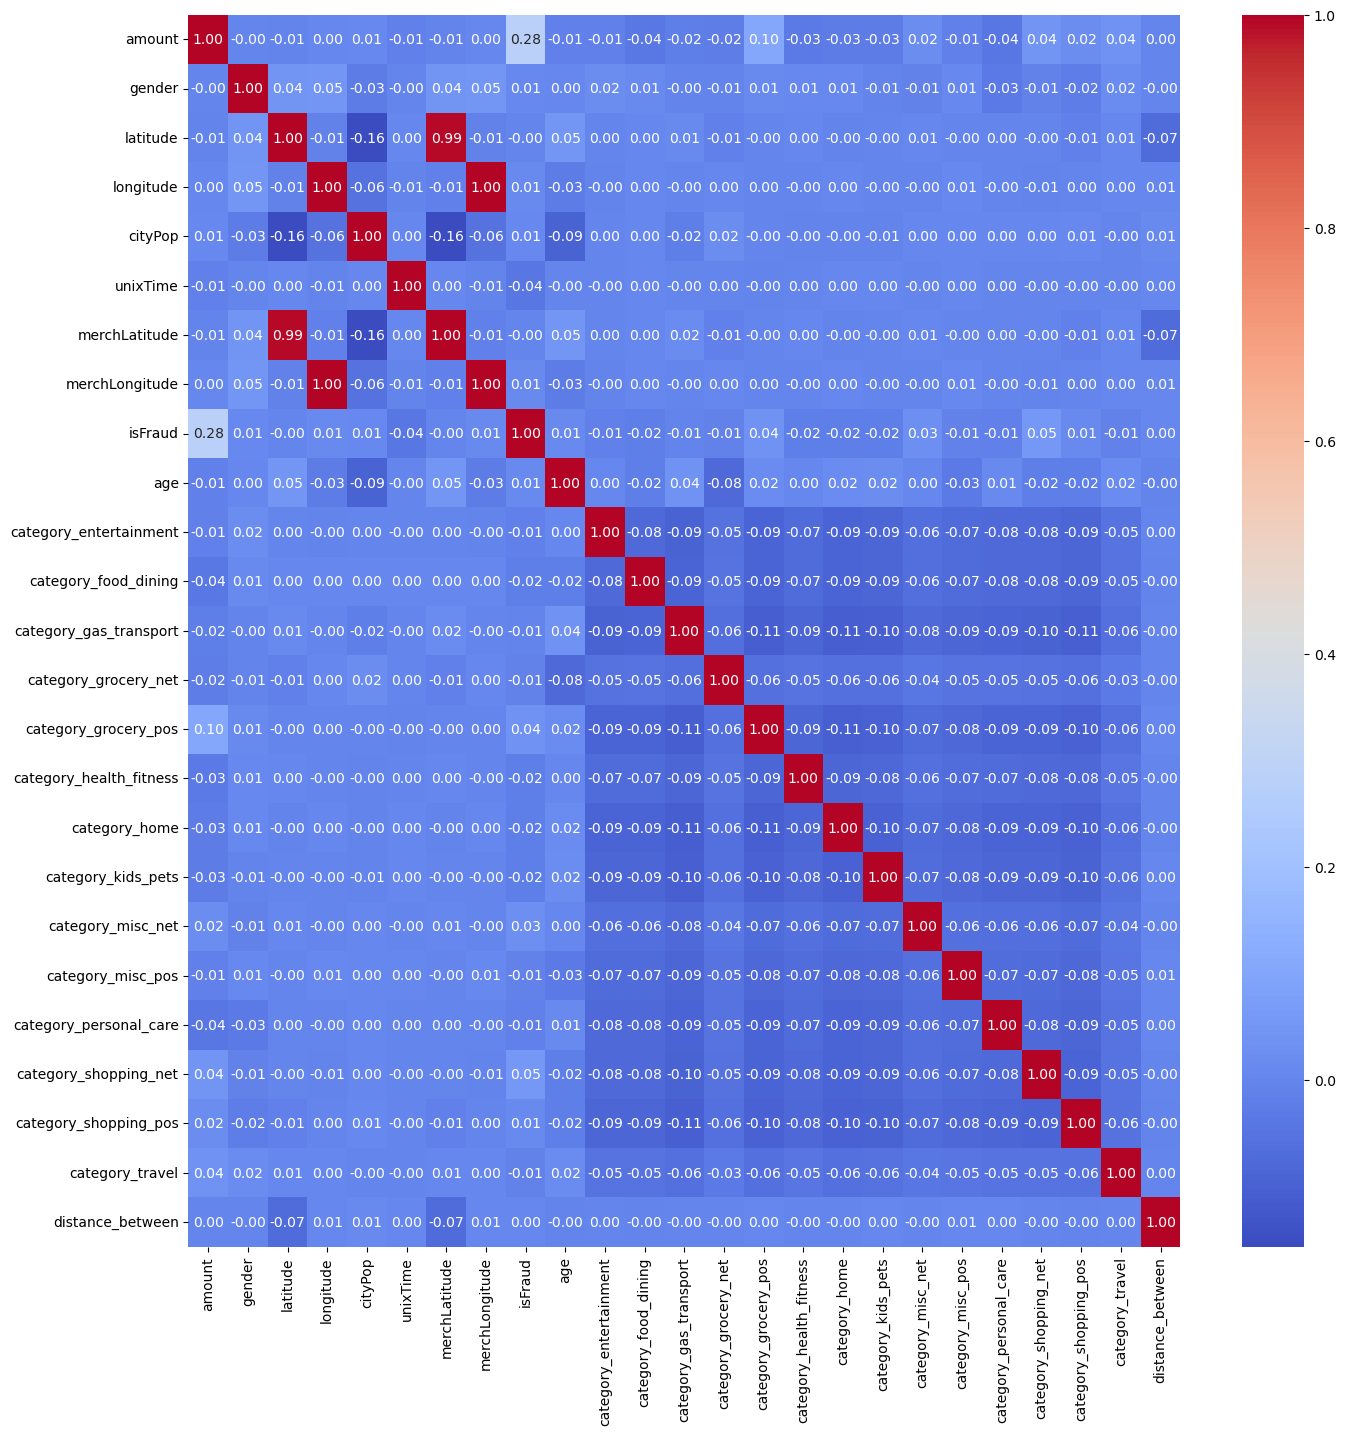

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [113]:
X_under_train = X_under_train.drop(['longitude', 'latitude'], axis=1)
X_under_test = X_under_test.drop(['longitude', 'latitude'], axis=1)

KeyError: "['longitude', 'latitude'] not found in axis"

In [93]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Fit the RandomForestClassifier
sel = RandomForestClassifier(n_estimators=100)
sel.fit(X_under_train, y_under_train)

# Get the importances of features
importances = sel.feature_importances_

# Set a threshold for feature selection: for instance, the median of importances
threshold_value = np.median(importances)

# Create the SelectFromModel object with your defined threshold
selection = SelectFromModel(sel, threshold=threshold_value)
selection.fit(X_under_train, y_under_train)

# Get the boolean mask of the selected features
selected_features_mask = selection.get_support()

# Get the names of the selected features
selected_features = X_under_train.columns[selected_features_mask]

# Count and print the selected features
print(f"Number of selected features: {selected_features.shape[0]}")
print(selected_features)


KeyboardInterrupt: 

# 7. Dropping Columns

In [94]:

# List of columns to keep
columns_to_keep = ['amount', 'cityPop', 'unixTime', 'merchLatitude', 'merchLongitude',
       'age', 'category_gas_transport', 'category_grocery_pos',
       'category_shopping_net', 'distance_between']

# Create a new DataFrame with only the specified columns
X_under_train = X_under_train[columns_to_keep]
X_under_test = X_under_test[columns_to_keep]

In [95]:
X_under_train.to_csv("./data/X_train.csv")
y_under_train.to_csv("./data/y_train.csv")
X_under_test.to_csv("./data/X_test.csv")
y_under_test.to_csv("./data/y_test.csv")

In [78]:
y_under_train.value_counts(), y_under_test.value_counts()

(0    144400
 1       437
 Name: isFraud, dtype: int64,
 0    36086
 1      124
 Name: isFraud, dtype: int64)

## Applying to the whole dataset

In [114]:
columns_to_keep = ['amount', 'cityPop', 'unixTime', 'merchLatitude', 'merchLongitude',
       'age', 'category_gas_transport', 'category_grocery_pos',
       'category_shopping_net', 'distance_between', 'risk']

df = df[columns_to_keep]
df.to_csv("./data/data.csv")

df.head()

,amount,cityPop,unixTime,merchLatitude,merchLongitude,age,category_gas_transport,category_grocery_pos,category_shopping_net,distance_between,risk
0,0.160662,0.000039,0.030577,0.570467,0.688879,0.4375,0,0,0,0.516566,0
1,0.031883,0.001048,0.918571,0.562831,0.756507,0.3625,0,0,0,0.570053,0
2,0.002516,0.138095,0.248599,0.476093,0.723469,0.6125,0,0,0,0.356844,0
3,0.002141,0.000135,0.922283,0.579759,0.517627,0.1125,0,0,0,0.639073,1
4,0.195016,0.005501,0.487544,0.290348,0.616094,0.0500,0,0,0,0.636571,0


In [116]:
df.shape

(2251, 11)

In [104]:
df

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age,risk
0,fraud_Volkman Ltd,misc_net,667.17,0,Barnard,SD,57426,45.7205,-98.5534,63,Systems developer,1593287220,46.040300,-97.710460,NaN,54,0
1,fraud_Pfeffer and Sons,shopping_pos,132.40,1,Boyd,WI,54726,44.9437,-91.0294,1690,IT trainer,1608100140,45.680527,-91.026459,NaN,48,0
2,fraud_Kovacek Ltd,travel,10.45,0,Des Moines,IA,50312,41.5855,-93.6719,222785,Wellsite geologist,1596924120,41.593729,-94.291725,NaN,68,0
3,fraud_Lemke and Sons,travel,8.89,1,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1608162060,46.478129,-114.636119,NaN,28,1
4,fraud_Kerluke Inc,misc_net,809.83,0,Ruidoso,NM,88355,33.3305,-105.6933,8874,Licensed conveyancer,1600910040,32.842035,-104.904134,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,"fraud_Robel, Cummerata and Prosacco",gas_transport,49.57,1,Lohrville,IA,51453,42.2619,-94.5566,695,Administrator,1597711260,43.087884,-95.470979,NaN,69,0
2247,fraud_Cummerata-Jones,gas_transport,11.17,0,Thrall,TX,76578,30.5920,-97.2893,1766,Press sub,1597030860,30.611255,-98.145016,NaN,48,0
2248,fraud_Crooks and Sons,personal_care,64.48,0,Grandview,TX,76050,32.2779,-97.2351,5875,"Radiographer, therapeutic",1598743620,31.839034,-96.299775,NaN,31,0
2249,fraud_Emard Inc,gas_transport,61.49,0,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1609323060,42.446262,-76.721284,NaN,32,0
